<a href="https://colab.research.google.com/github/navyadua/christu-ug/blob/main/sem2/stats-tool-lab/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING DATASET

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/hotel_booking_demand_perfect.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_standardised,lead_time_normalised
0,City Hotel,1,314,2015,August,35,27,0,2,2,0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.80,0,0,Canceled,17-10-2014,-0.919817,0.576147
1,City Hotel,0,170,2017,August,31,5,0,1,2,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,130.50,0,1,Check-Out,06-08-2017,0.439106,0.311927
2,City Hotel,0,30,2015,October,41,8,0,0,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,0,No Deposit,50.0,0,Transient,0.00,0,0,Check-Out,08-10-2015,-2.180384,0.055046
3,City Hotel,1,323,2015,September,36,5,2,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.00,0,0,Canceled,06-07-2015,-0.935875,0.592661
4,Resort Hotel,0,288,2015,September,36,2,1,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,240.0,0,Transient-Party,110.70,0,0,Check-Out,07-09-2015,0.041666,0.528440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,City Hotel,0,111,2017,June,25,21,0,3,2,0,0,BB,AUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,126.00,0,0,Check-Out,24-06-2017,0.348779,NaN
435,City Hotel,0,97,2017,April,17,25,0,3,2,0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,0,Transient,115.00,0,0,Check-Out,28-04-2017,0.127979,NaN
436,Resort Hotel,0,124,2017,March,13,26,2,4,1,0,0,BB,PRT,Online TA,TA/TO,0,0,1,A,C,1,No Deposit,241.0,0,Transient,27.07,0,0,Check-Out,01-04-2017,-1.637016,NaN
437,City Hotel,0,151,2016,January,4,19,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,2,No Deposit,19.0,63,Transient-Party,71.00,0,0,Check-Out,21-01-2016,-0.755221,NaN


#GRAPHS AND CHARTS



##BAR CHART

###Vertical

In [ ]:
country = pd.DataFrame(df.country.value_counts())

In [ ]:
pip install country_converter

In [ ]:
import country_converter as coco
country_names = df.country.unique()
standard_names = coco.convert(names=list(country_names), to='name_short')

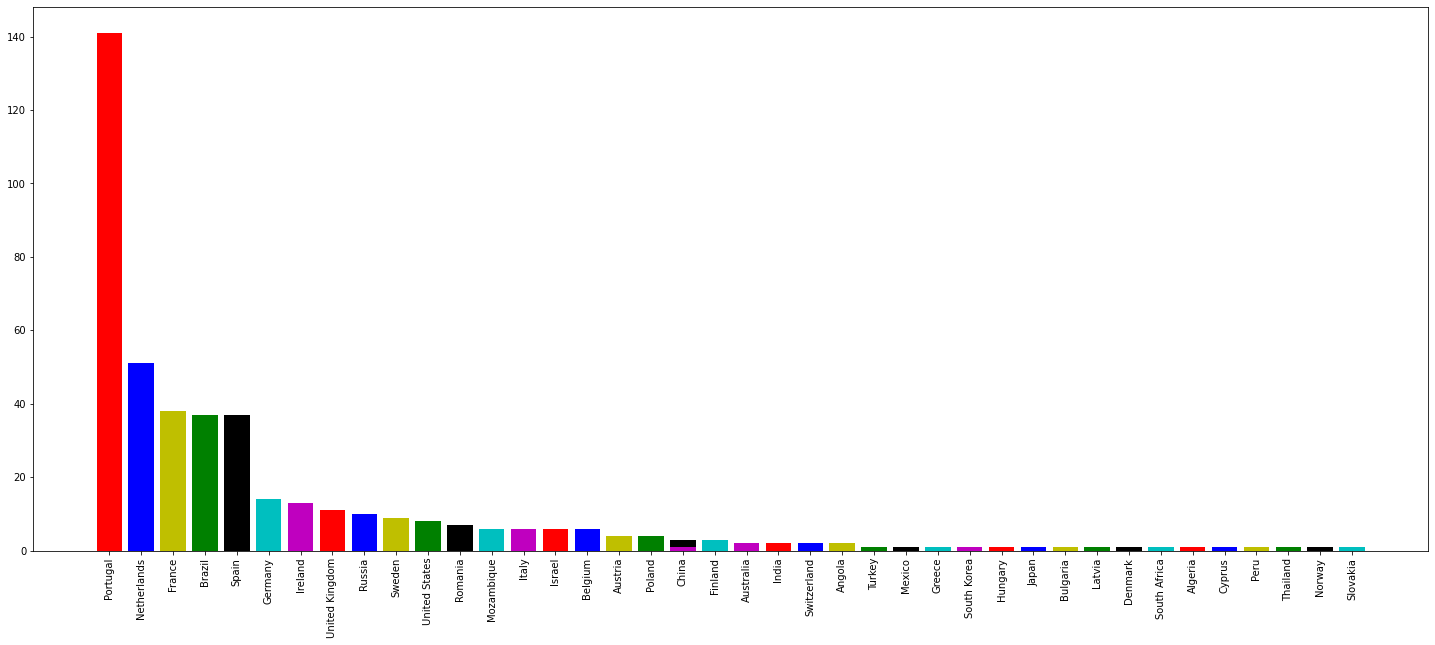

In [ ]:
plt.figure(figsize=(25,10))
x =  standard_names
y = country.country
plt.bar(x,y,color = ['r','b','y','g','k','c','m'])
plt.xticks(rotation=90)
plt.show()



---


From the above Bar Chart , We can se that most of the records in the dataset correspons to Portugal. So we can say that most of the hotels are in Portugal. Other than that , we can see that Netherlands , France and Brazil also have a major portion in the hotel industry

---



### Horizontal

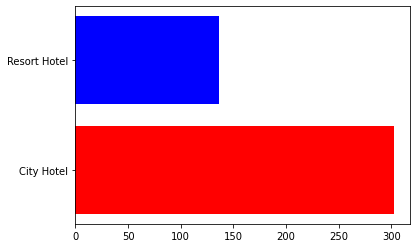

In [ ]:
hotel = pd.DataFrame(df.hotel.value_counts())
x = hotel.index
y = hotel.hotel
plt.barh(x,y,color = ['r','b'])
plt.show()



---


This horizontal Bar Chart Shows that there are more city hotels than resort hotels in the world


---



###Stacked

In [ ]:
month = pd.crosstab(index=df['arrival_date_month'], columns=df['is_canceled'])
month

is_canceled,0,1
arrival_date_month,,
April,33,16
August,44,27
December,13,7
February,15,6
January,16,5
July,27,18
June,25,16
March,17,15
May,26,15


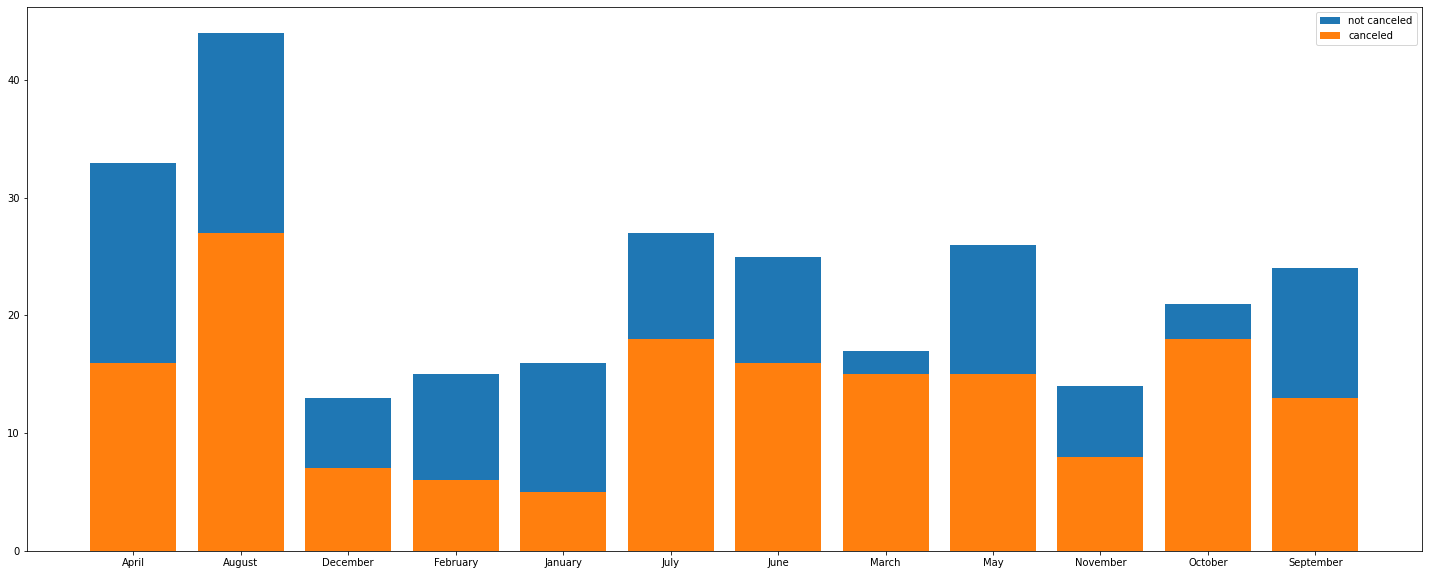

In [ ]:
plt.figure(figsize=(25,10))
label = month.index
plt.bar(label,month[0],label = 'not canceled')
plt.bar(label,month[1],label='canceled')
plt.legend()
plt.plot()
plt.show()



---


This stacked Bar Chart is showing how many hotels are cancelled and how many are not in a particular month

---

###Grouped

In [ ]:
res = pd.crosstab(index=df['reservation_status'], columns=df['hotel'])
res

hotel,City Hotel,Resort Hotel
reservation_status,,
Canceled,122,39
Check-Out,179,96
No-Show,2,1


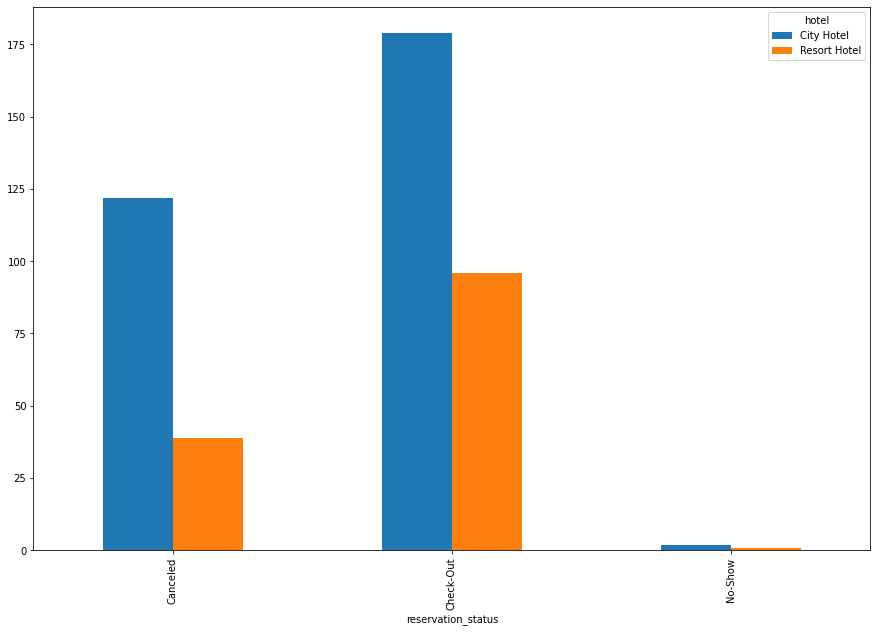

In [ ]:
res.plot.bar(figsize=(15,10))
plt.plot()
plt.show()

We can see that the Number of NO - Show is very less as compared to Cancelled
or Check - Out

##PIE CHART

###Simple

In [ ]:
df['market_segment'].unique()

array(['Groups', 'Online TA', 'Offline TA/TO', 'Direct', 'Corporate'],
      dtype=object)

[]

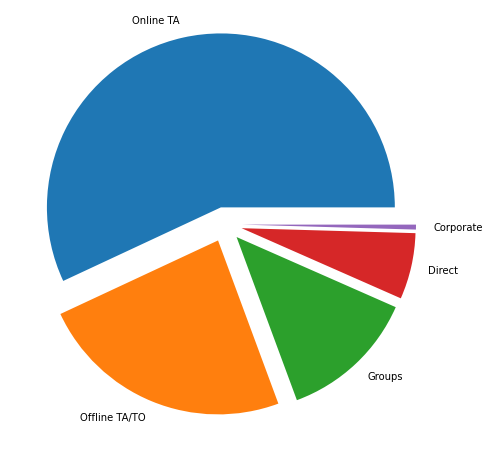

In [ ]:
labels = df['market_segment'].value_counts().index.tolist()
data = df['market_segment'].value_counts().tolist()
plt.figure(figsize=(8,8))
plt.pie(data,labels=labels,explode=[0.1,0.1,0.1,0.1,0.1])
plt.plot()

This Pie Chart Shows us that most of the bookings are made via ONLINE Travel Agents even more than Offline Travel Agents.
And very less bookings are made through Corporate Agencies.
Groups and Direct Method is also common but not as much as Travel Agencies and Tour Operators

###Pie Chart with Percentage

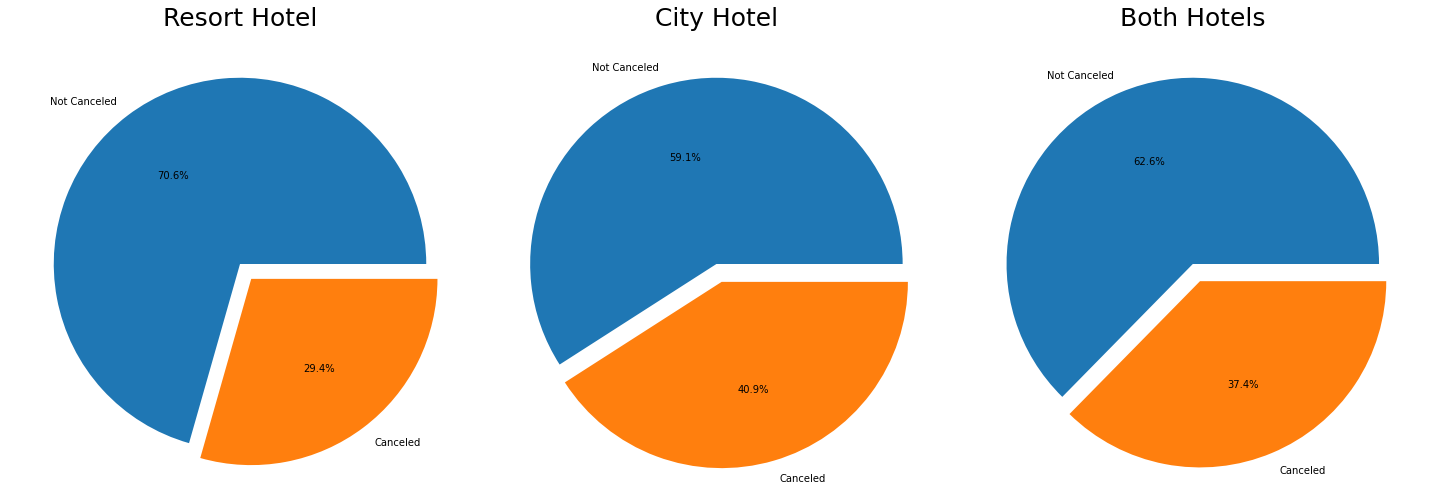

In [ ]:
resort_cancel_sizes=df[df["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancel_sizes=df[df["hotel"]=="City Hotel"]["is_canceled"].value_counts()
cancel_sizes=df["is_canceled"].value_counts()

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.pie(resort_cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Resort Hotel", fontsize=25)

plt.subplot(1,3,2)
plt.pie(city_cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("City Hotel", fontsize=25)

plt.subplot(1,3,3)
plt.pie(cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Both Hotels", fontsize=25)

plt.tight_layout()

From the above Pie Charts, it is clearly visible that either be it a City Hotel or a Resort Hotel , Cancellation Chance is lesser. Resort Hotel has about 29.4 % of cancellation chance where as City Hotel has a 40.9% of cancellation Chance.If we consider both hotels, there is about 37.4% cancellation possibility

###Doughnut Pie

[]

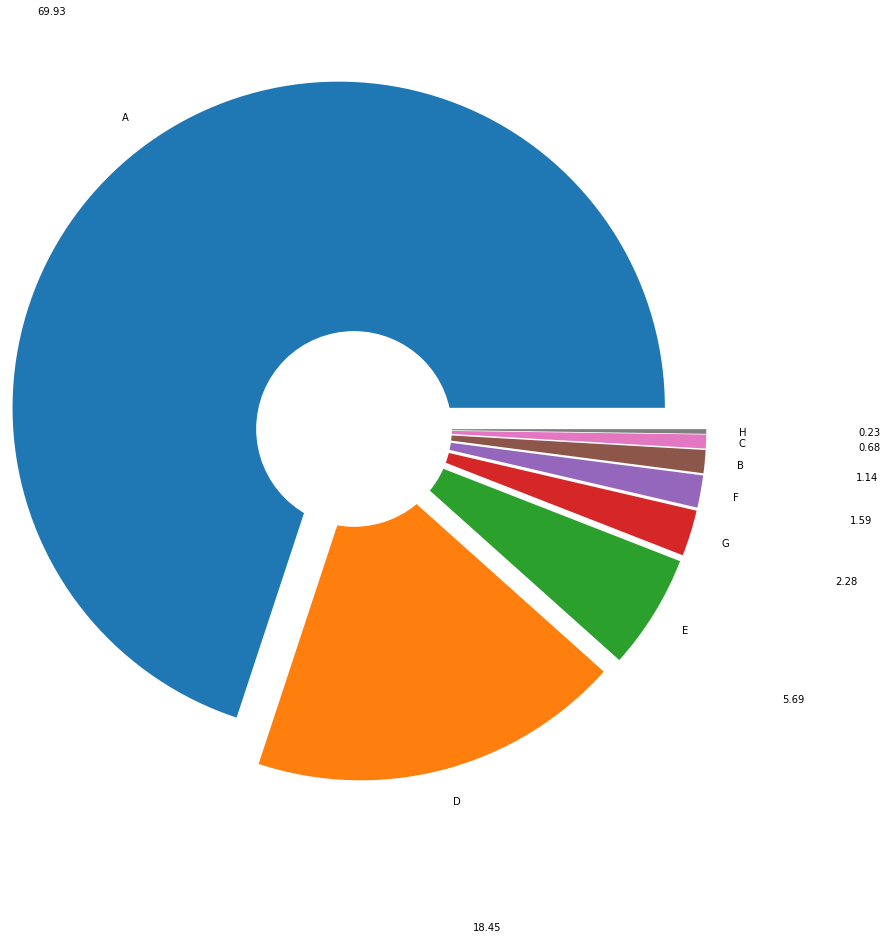

In [ ]:
labels = df['reserved_room_type'].value_counts().index.tolist()
data = df['reserved_room_type'].value_counts().tolist()
plt.figure(figsize=(6,6))
plt.pie(data,labels=labels,autopct='%.2f',radius = 2.5 ,labeldistance=1.1, pctdistance = 1.5,explode = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
circle = plt.Circle(xy = (0,0),radius = 0.75 , facecolor = 'white')
plt.gca().add_artist(circle)
plt.plot()

The most common room type seems to be A with about 69.93% reservations made. And the least common is H with 0.23 % reservations made. After Type A , D is also common with 18.45% and E with 5.69%. Rest types booking chance lie between 2.28% and 0.68%

##LINE CHART

In [ ]:
#Created a new column in my dataset which is the arrival date month year by adding arrival date onth and arrival date year.
df["arrival_date_month_year"]=df["arrival_date_month"].astype("str")+" "+df["arrival_date_year"].astype("str")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_standardised,lead_time_normalised,arrival_date_month_year
0,City Hotel,1,314,2015,August,35,27,0,2,2,0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.8,0,0,Canceled,17-10-2014,-0.919817,0.576147,August 2015
1,City Hotel,0,170,2017,August,31,5,0,1,2,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,130.5,0,1,Check-Out,06-08-2017,0.439106,0.311927,August 2017
2,City Hotel,0,30,2015,October,41,8,0,0,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,0,No Deposit,50.0,0,Transient,0.0,0,0,Check-Out,08-10-2015,-2.180384,0.055046,October 2015
3,City Hotel,1,323,2015,September,36,5,2,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.0,0,0,Canceled,06-07-2015,-0.935875,0.592661,September 2015
4,Resort Hotel,0,288,2015,September,36,2,1,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,240.0,0,Transient-Party,110.7,0,0,Check-Out,07-09-2015,0.041666,0.528440,September 2015


In [ ]:
df["total_guest"]=df["adults"]+df["children"]

In [ ]:
#Created a dataframe of how many guests of resort hotel and how many guests of city hotel are there.
guest_resort=0
guest_city=0
guest_resort_monthly=[]
guest_city_monthly=[]

for month_year in df["arrival_date_month_year"].unique():
  for i in range(len(df)):
    if (df["arrival_date_month_year"][i]==month_year)&(df["is_canceled"][i]==0)&(df["hotel"][i]=="Resort Hotel"):
      guest_resort+=df["total_guest"][i]
    elif (df["arrival_date_month_year"][i]==month_year)&(df["is_canceled"][i]==0)&(df["hotel"][i]=="City Hotel"):
      guest_city+=df["total_guest"][i]
  guest_resort_monthly.append(guest_resort)
  guest_city_monthly.append(guest_city)

In [ ]:
#And then distributed them on basis of theit arrival month year.
guestdf=pd.DataFrame(list(zip(df["arrival_date_month_year"].unique(),
                              guest_resort_monthly, guest_city_monthly)),
                     columns=["Month_Year","Total Guest Resort Hotel", "Total Guest City Hotel"])
guestdf

,Month_Year,Total Guest Resort Hotel,Total Guest City Hotel
0,August 2015,8,9
1,August 2017,22,43
2,October 2015,24,57
3,September 2015,31,68
4,June 2017,40,86
5,August 2016,50,120
6,May 2016,56,139
7,June 2016,65,155
8,December 2016,74,162
9,November 2015,80,169


[]

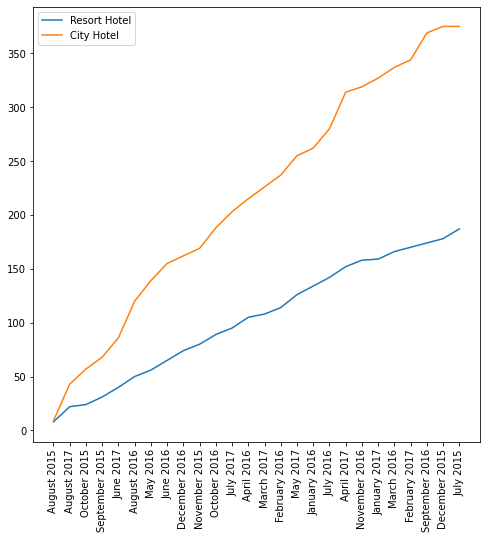

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(guestdf["Month_Year"], guestdf["Total Guest Resort Hotel"])
plt.plot(guestdf["Month_Year"], guestdf["Total Guest City Hotel"])
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=90)
plt.plot()

This Line Chart shows that most hotels were booked in July 2015 and least were booked in August 2015 whether it be a city hotel or a resort hotel

##HISTOGRAM

###Simple Histogram

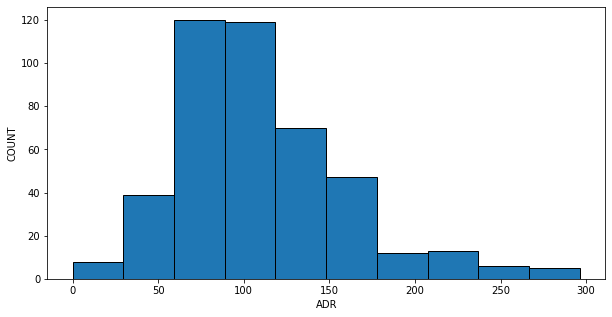

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['adr'],edgecolor='black')
plt.xlabel("ADR")
plt.ylabel("COUNT")
plt.plot()
plt.show()

From this histogram we can see that , the adr ( Average Daily Rate Ranges between 0 and 300 and mostly lies from 75 to 125)


###Histogram with Density Curve

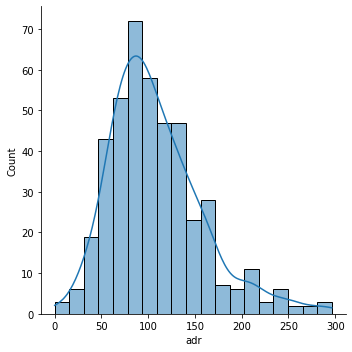

In [ ]:
sns.displot(data = df['adr'],kde=True)

###Histogram with Category Variable

In [ ]:
df['adr'].groupby(by = df['deposit_type']).count()

deposit_type
No Deposit    392
Non Refund     47
Name: adr, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


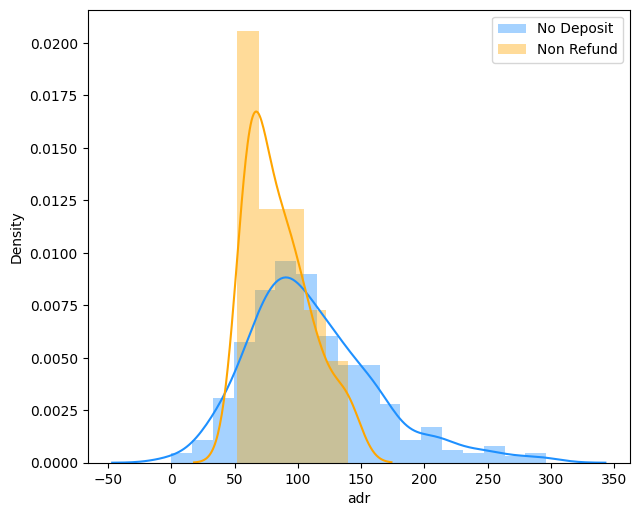

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df['deposit_type']=='No Deposit', "adr"] , color="dodgerblue", label="No Deposit")
sns.distplot( df.loc[df['deposit_type']=='Non Refund', "adr"] , color="orange", label="Non Refund")
plt.legend()
plt.show()

##SCATTER PLOT

###Scatter Plot

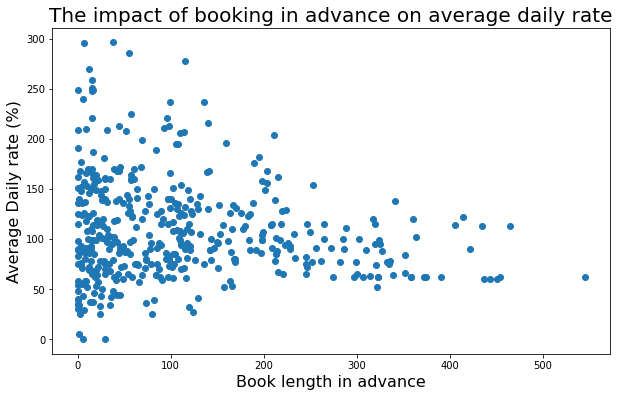

In [ ]:
plt.figure(figsize=(10,6))
x = df['lead_time']
y = df['adr']
plt.scatter( x , y )
plt.title('The impact of booking in advance on average daily rate',fontsize=20)
plt.xlabel('Book length in advance',fontsize=16)
plt.ylabel('Average Daily rate (%)',fontsize=16)
plt.show()

###Grouped Scatter Plot

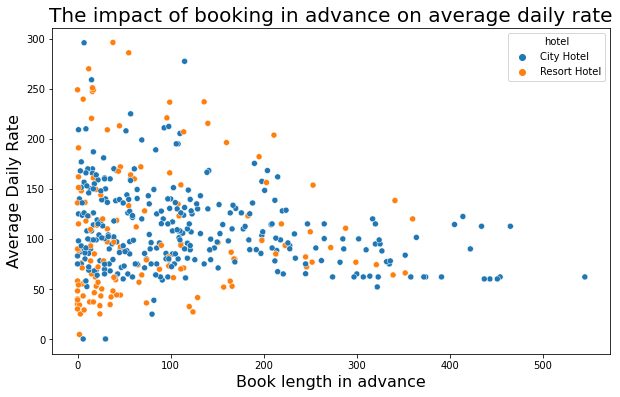

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot( x ='lead_time' , y = 'adr', hue="hotel", data=df)
plt.title('The impact of booking in advance on average daily rate',fontsize=20)
plt.xlabel('Book length in advance',fontsize=16)
plt.ylabel('Average Daily Rate',fontsize=16)
plt.show()

###Bubble Scatter Plot

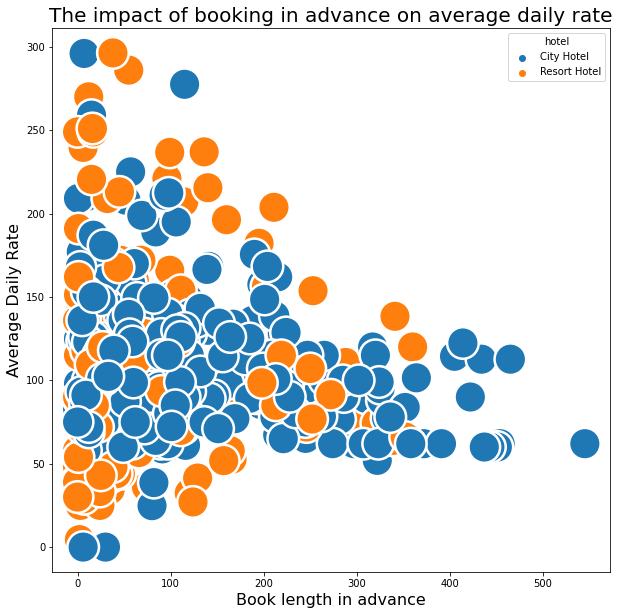

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot( x ='lead_time' , y = 'adr', hue="hotel", data=df , s = 1000)
plt.title('The impact of booking in advance on average daily rate',fontsize=20)
plt.xlabel('Book length in advance',fontsize=16)
plt.ylabel('Average Daily Rate',fontsize=16)
plt.show()

##BOXPLOT

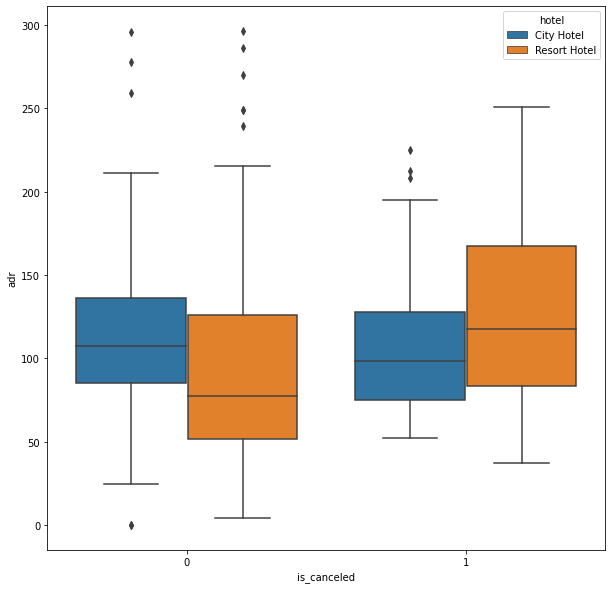

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x="is_canceled", y="adr", hue="hotel", data=df)

##VIOLIN PLOT

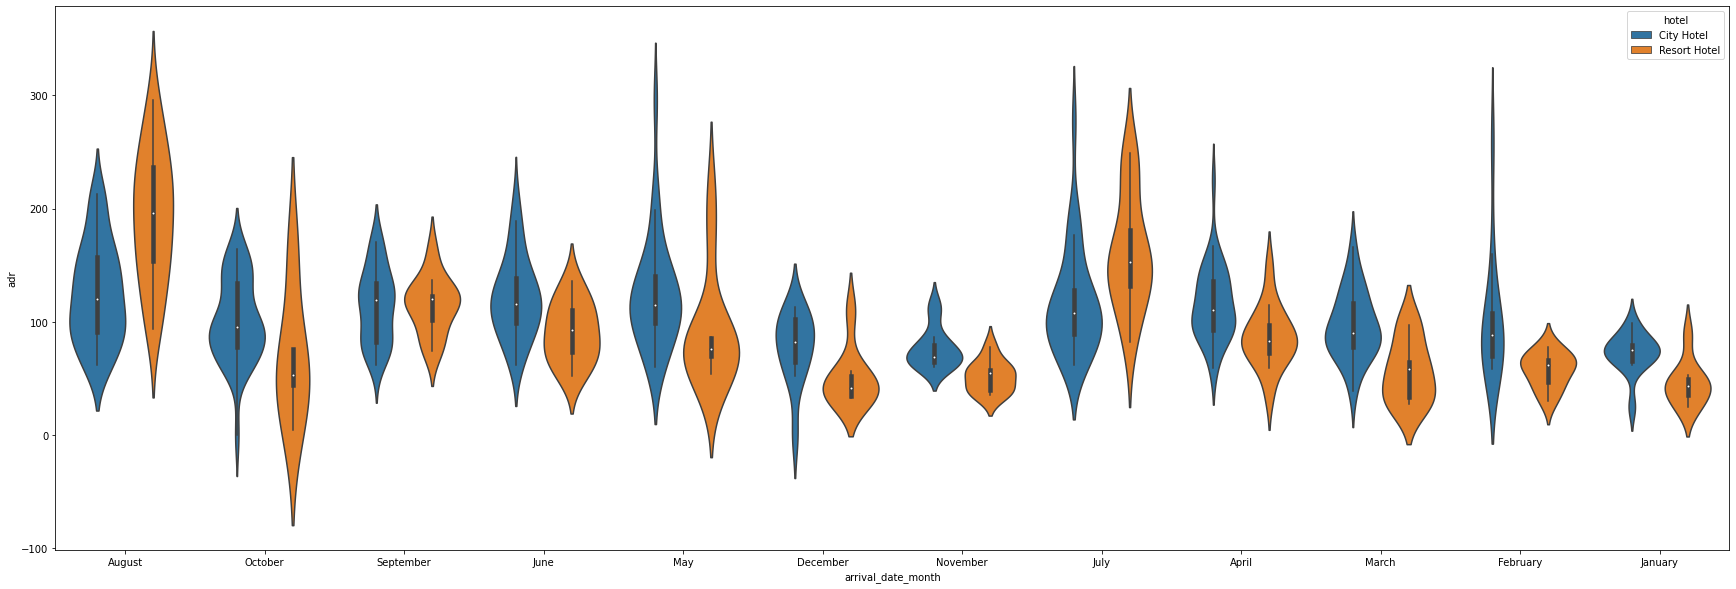

In [ ]:
plt.figure(figsize = (30,10))
sns.violinplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()